## Intersection of Two Curves

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

# We are interested in finding intersection of f(x) and g(x).
# Use fsolve to find roots of h(x) = f(x) - g(x)

def f(x): return x**3 + 1
def g(x): return 3*(x**2)
def h(x): return f(x) - g(x)

In [4]:
def find_intersections(f, a, b, numDivisions, round = True, decimal_places = 10):
    
    intersections = []
    x_guesses = np.linspace(a, b, numDivisions, endpoint = True)
    
    for guess in x_guesses:
        try:
            if round == True:
                intersections.append( np.round(fsolve(f, guess)[0], decimal_places) )
            else:
                intersections.append(fsolve(f, guess)[0]) # Note: fsolve has arg 'full_output=True for additional details
        except:
            pass
    # List is typecast to a set, to eleminate repetition, then back to list type.
    intersections = list(set(intersections))
    intersections.sort()
    return intersections

results = find_intersections(h, -3, 3, 10)
print(results)

[-0.5320888862, 0.6527036447, 2.8793852416]


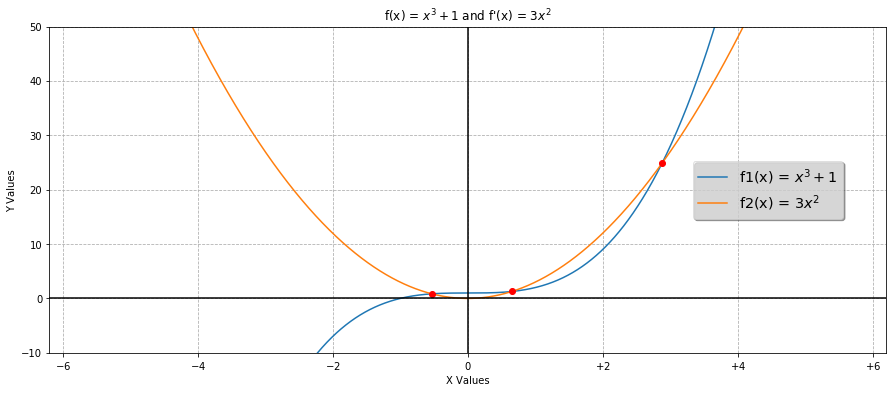

In [5]:
x_vals = np.linspace(-10, 10, 10**4)
y1_vals = f(x_vals)
y2_vals = g(x_vals) 

fig = plt.figure(figsize=(15,6))
ax = plt.subplot()

ax.grid(linestyle='dashed')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('f(x) = $x^3 + 1$ and f\'(x) = $3x^2$')

ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_xticklabels(['$-6$', '$-4$', '$-2$', '$0$', '$+2$', '$+4$', '$+6$'])

plt.plot(x_vals, y1_vals, label='f1(x) = $x^3 + 1$')
plt.plot(x_vals, y2_vals, label='f2(x) = $3x^2$')

for intersect in results:
    plt.plot(intersect, f(intersect), color='r', marker='o')

plt.xlim(-6.2, 6.2)
plt.ylim(-10, 50)

# Add x and y-axis to the plot
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
    
legend = plt.legend(loc=5, fontsize='x-large', shadow=(True), borderaxespad=3)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()